In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from yahoo_fin.stock_info import get_data
from get_all_tickers import get_tickers as gt
import matplotlib.pyplot as plt

In [5]:
bonds = pd.read_csv("T10Y2Y.csv")

In [6]:
gold = get_data("GC=F")
gold = gold.reset_index()
gold

,index,open,high,low,close,adjclose,volume,ticker
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0.0,GC=F
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0.0,GC=F
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0.0,GC=F
3,2000-09-04,NaN,NaN,NaN,NaN,NaN,NaN,GC=F
4,2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2.0,GC=F
...,...,...,...,...,...,...,...,...
5522,2022-05-09,1866.599976,1867.500000,1854.000000,1857.099976,1857.099976,304.0,GC=F
5523,2022-05-10,1839.900024,1839.900024,1839.900024,1839.900024,1839.900024,1540.0,GC=F
5524,2022-05-11,1841.500000,1852.599976,1841.000000,1852.599976,1852.599976,892.0,GC=F
5525,2022-05-12,1849.800049,1851.900024,1822.199951,1823.800049,1823.800049,153.0,GC=F


In [7]:
gold = gold[['index','close']]
gold.columns = ['date','price']
gold = gold.dropna()


In [8]:
bonds=bonds[10:]
bonds.info()

In [10]:
bonds['DATE'] = pd.to_datetime(bonds['DATE'], yearfirst=True)

In [11]:
bonds.columns=["date","yield"]
bonds

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11940 entries, 10 to 11949
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    11940 non-null  datetime64[ns]
 1   T10Y2Y  11940 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 186.7+ KB


,date,yield
10,1976-06-15,0.83
11,1976-06-16,0.81
12,1976-06-17,0.79
13,1976-06-18,0.82
14,1976-06-21,0.85
...,...,...
11945,2022-03-15,0.3
11946,2022-03-16,0.24
11947,2022-03-17,0.26
11948,2022-03-18,0.17


In [12]:
bonds['yield'] = pd.to_numeric(bonds['yield'], errors='coerce')

<AxesSubplot:xlabel='date', ylabel='yield'>

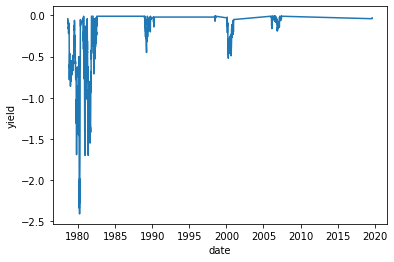

In [13]:
sns.lineplot(x=bonds[bonds['yield']<0]['date'], y=bonds[bonds['yield']<0]['yield'])

In [14]:
bonds_negative = bonds[(bonds['yield']<0) & (bonds['date'].dt.year>1984)]

In [15]:
pd.merge(bonds,gold).to_excel("gold_vs_10-2ybonds.xlsx")

In [16]:
gold_price_when_bonds_negative=pd.merge(bonds_negative,gold)
gold_price_when_bonds_negative

,date,yield,price
0,2000-08-30,-0.43,273.899994
1,2000-08-31,-0.45,278.299988
2,2000-09-01,-0.41,277.000000
3,2000-09-05,-0.40,275.799988
4,2000-09-06,-0.39,274.200012
...,...,...,...
315,2007-06-04,-0.04,670.700012
316,2007-06-05,-0.01,669.599976
317,2019-08-27,-0.04,1541.000000
318,2019-08-28,-0.03,1537.800049


In [25]:
gold.diff().mean()[1]

0.28216713589194503

In [26]:
gold_price_when_bonds_negative_diff=gold_price_when_bonds_negative.diff()
gold_price_when_bonds_negative_diff[gold_price_when_bonds_negative_diff['date']=='1 days'].mean()[2]

0.12050165790893044

In [27]:
gold.diff().mean()[1]/gold_price_when_bonds_negative_diff[gold_price_when_bonds_negative_diff['date']=='1 days'].mean()[2]

2.341603765362248

## Gold prices have grown 2.34x slower when 10y-2y yield curve was inverted wheen compared to all-time growth